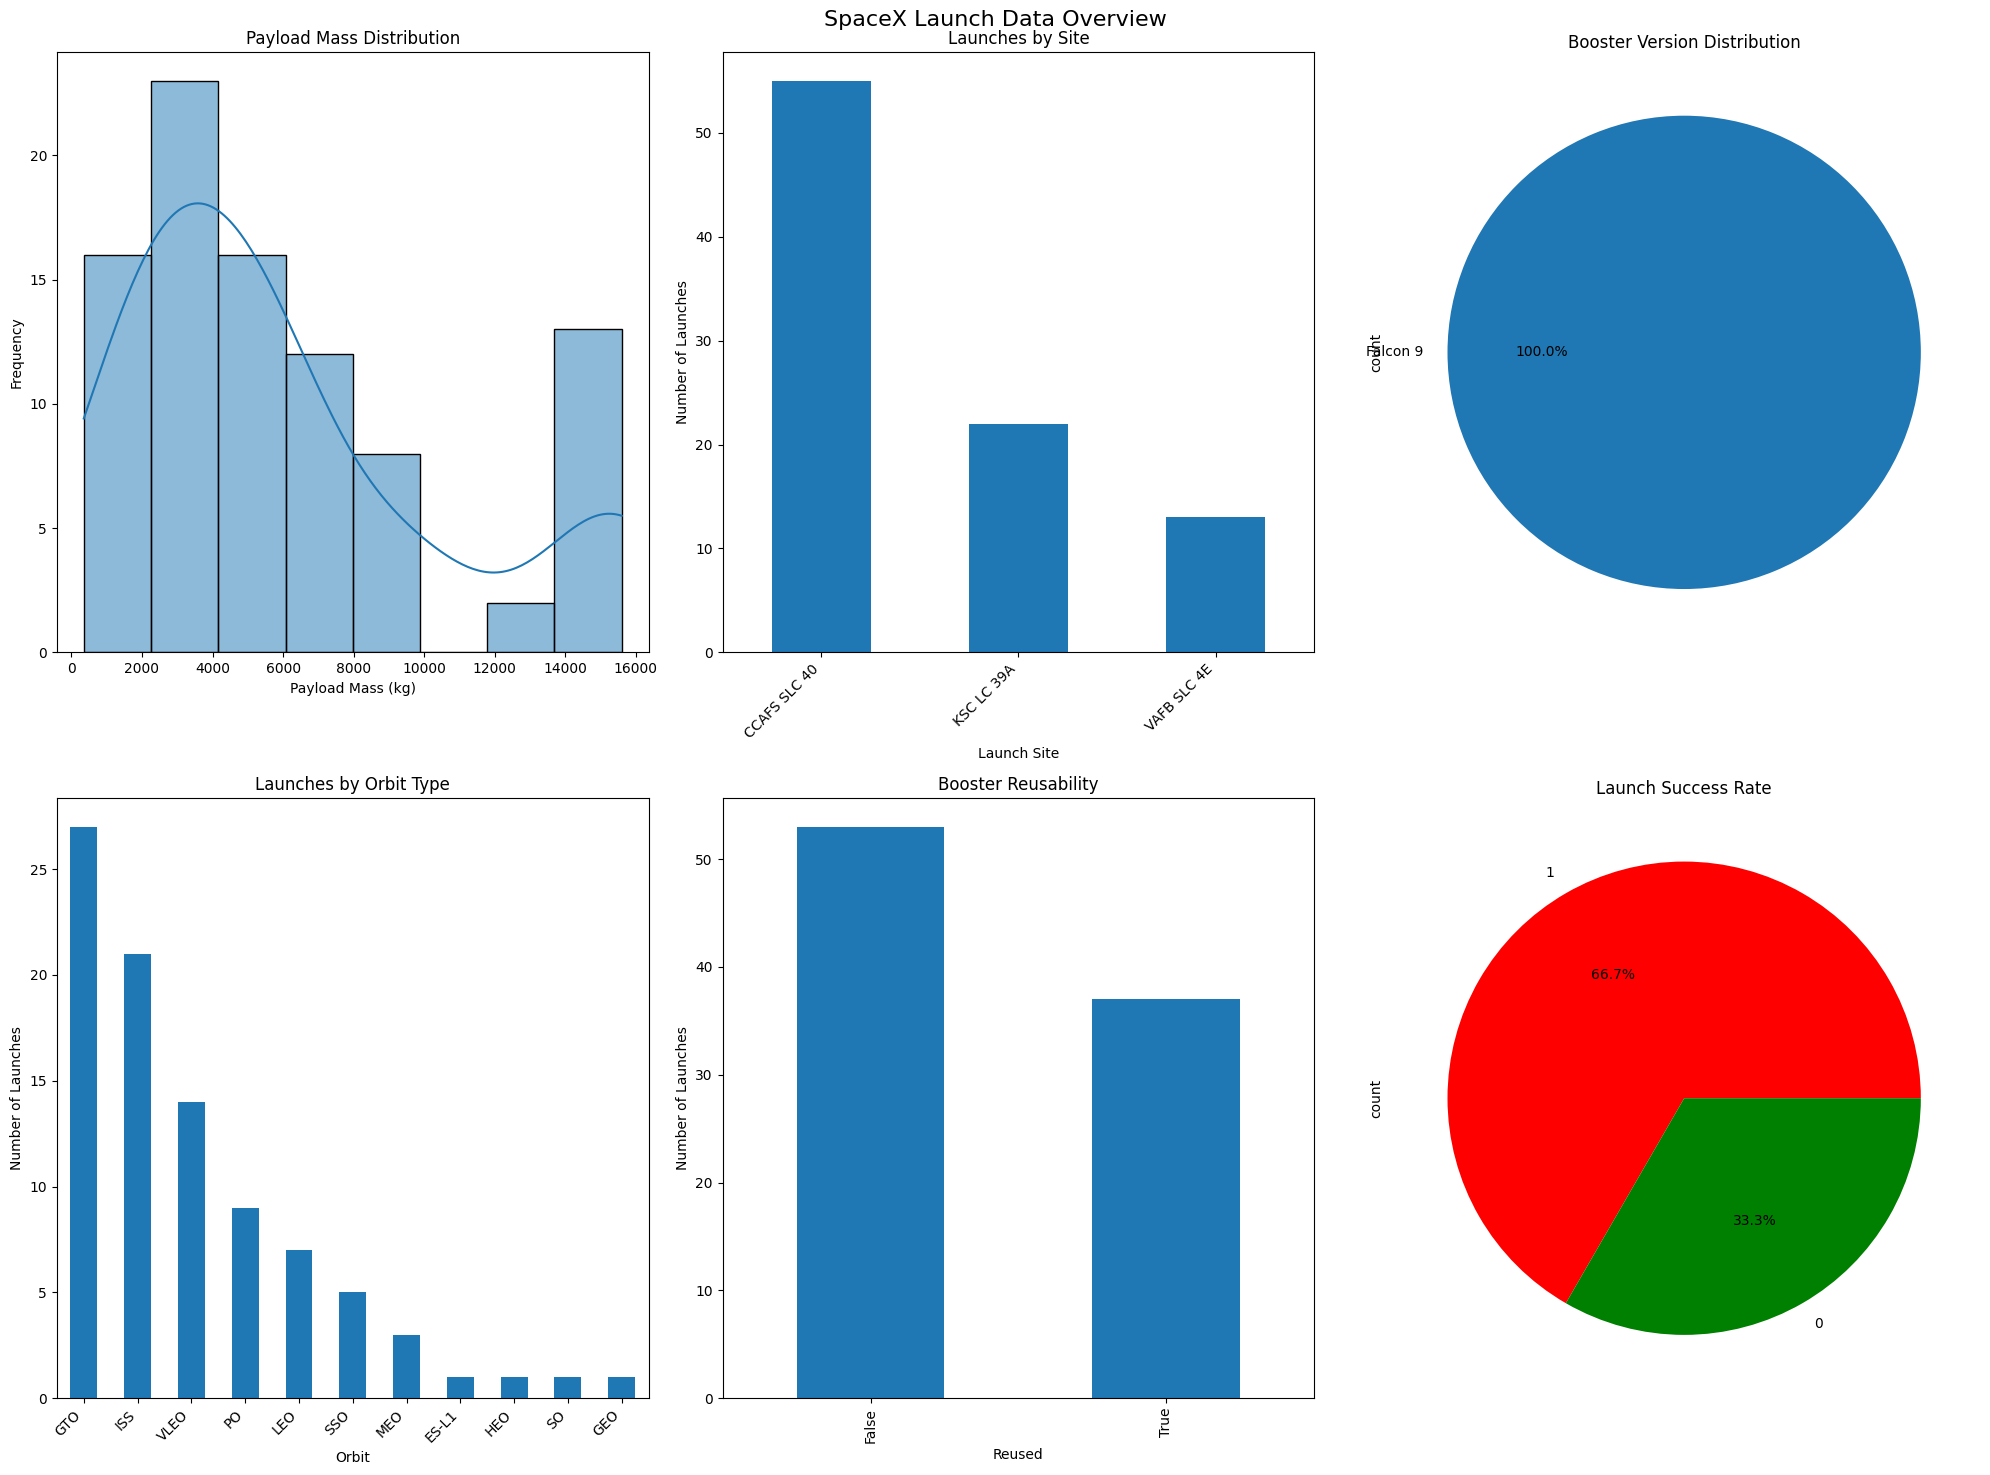

Data Overview Insights:

Total Number of Launches: 90

Launch Sites:
LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Orbit Types:
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

Launch Success:
Class
1    60
0    30
Name: count, dtype: int64

Descriptive Statistics for Payload Mass:
count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

plt.figure(figsize=(20, 15))
plt.suptitle('SpaceX Launch Data Overview', fontsize=16)

plt.subplot(2, 3, 1)
sns.histplot(data['PayloadMass'], kde=True)
plt.title('Payload Mass Distribution')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
launch_site_counts = data['LaunchSite'].value_counts()
launch_site_counts.plot(kind='bar')
plt.title('Launches by Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 3)
booster_counts = data['BoosterVersion'].value_counts()
booster_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Booster Version Distribution')

plt.subplot(2, 3, 4)
orbit_counts = data['Orbit'].value_counts()
orbit_counts.plot(kind='bar')
plt.title('Launches by Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 5)
reused_counts = data['Reused'].value_counts()
reused_counts.plot(kind='bar')
plt.title('Booster Reusability')
plt.xlabel('Reused')
plt.ylabel('Number of Launches')

plt.subplot(2, 3, 6)
success_counts = data['Class'].value_counts()
success_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Launch Success Rate')

plt.tight_layout()
plt.show()

print("Data Overview Insights:")
print("\nTotal Number of Launches:", len(data))
print("\nLaunch Sites:")
print(launch_site_counts)
print("\nOrbit Types:")
print(orbit_counts)
print("\nLaunch Success:")
print(success_counts)

print("\nDescriptive Statistics for Payload Mass:")
print(data['PayloadMass'].describe())

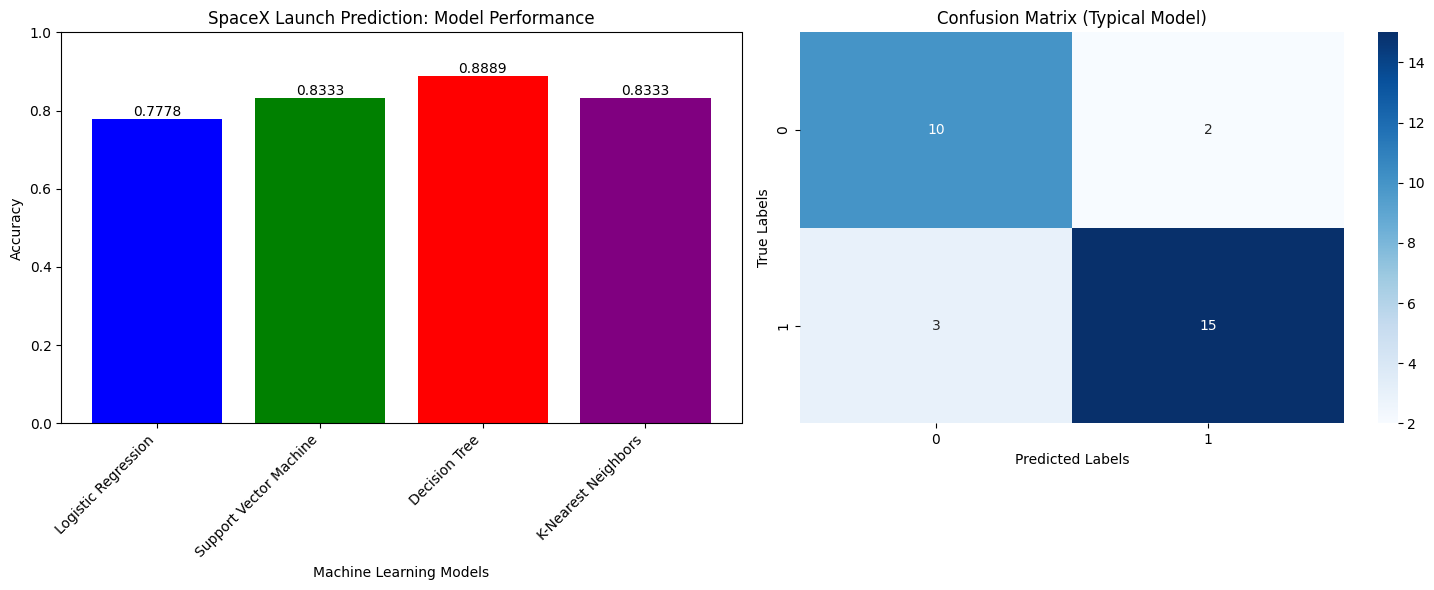

Model Performance Summary:
Logistic Regression: 0.7778
Support Vector Machine: 0.8333
Decision Tree: 0.8889
K-Nearest Neighbors: 0.8333


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors']
accuracies = [0.7778, 0.8333, 0.8889, 0.8333]

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('SpaceX Launch Prediction: Model Performance')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)

cm = np.array([[10, 2], [3, 15]])  # Example values
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Typical Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()
print("Model Performance Summary:")
for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy:.4f}")

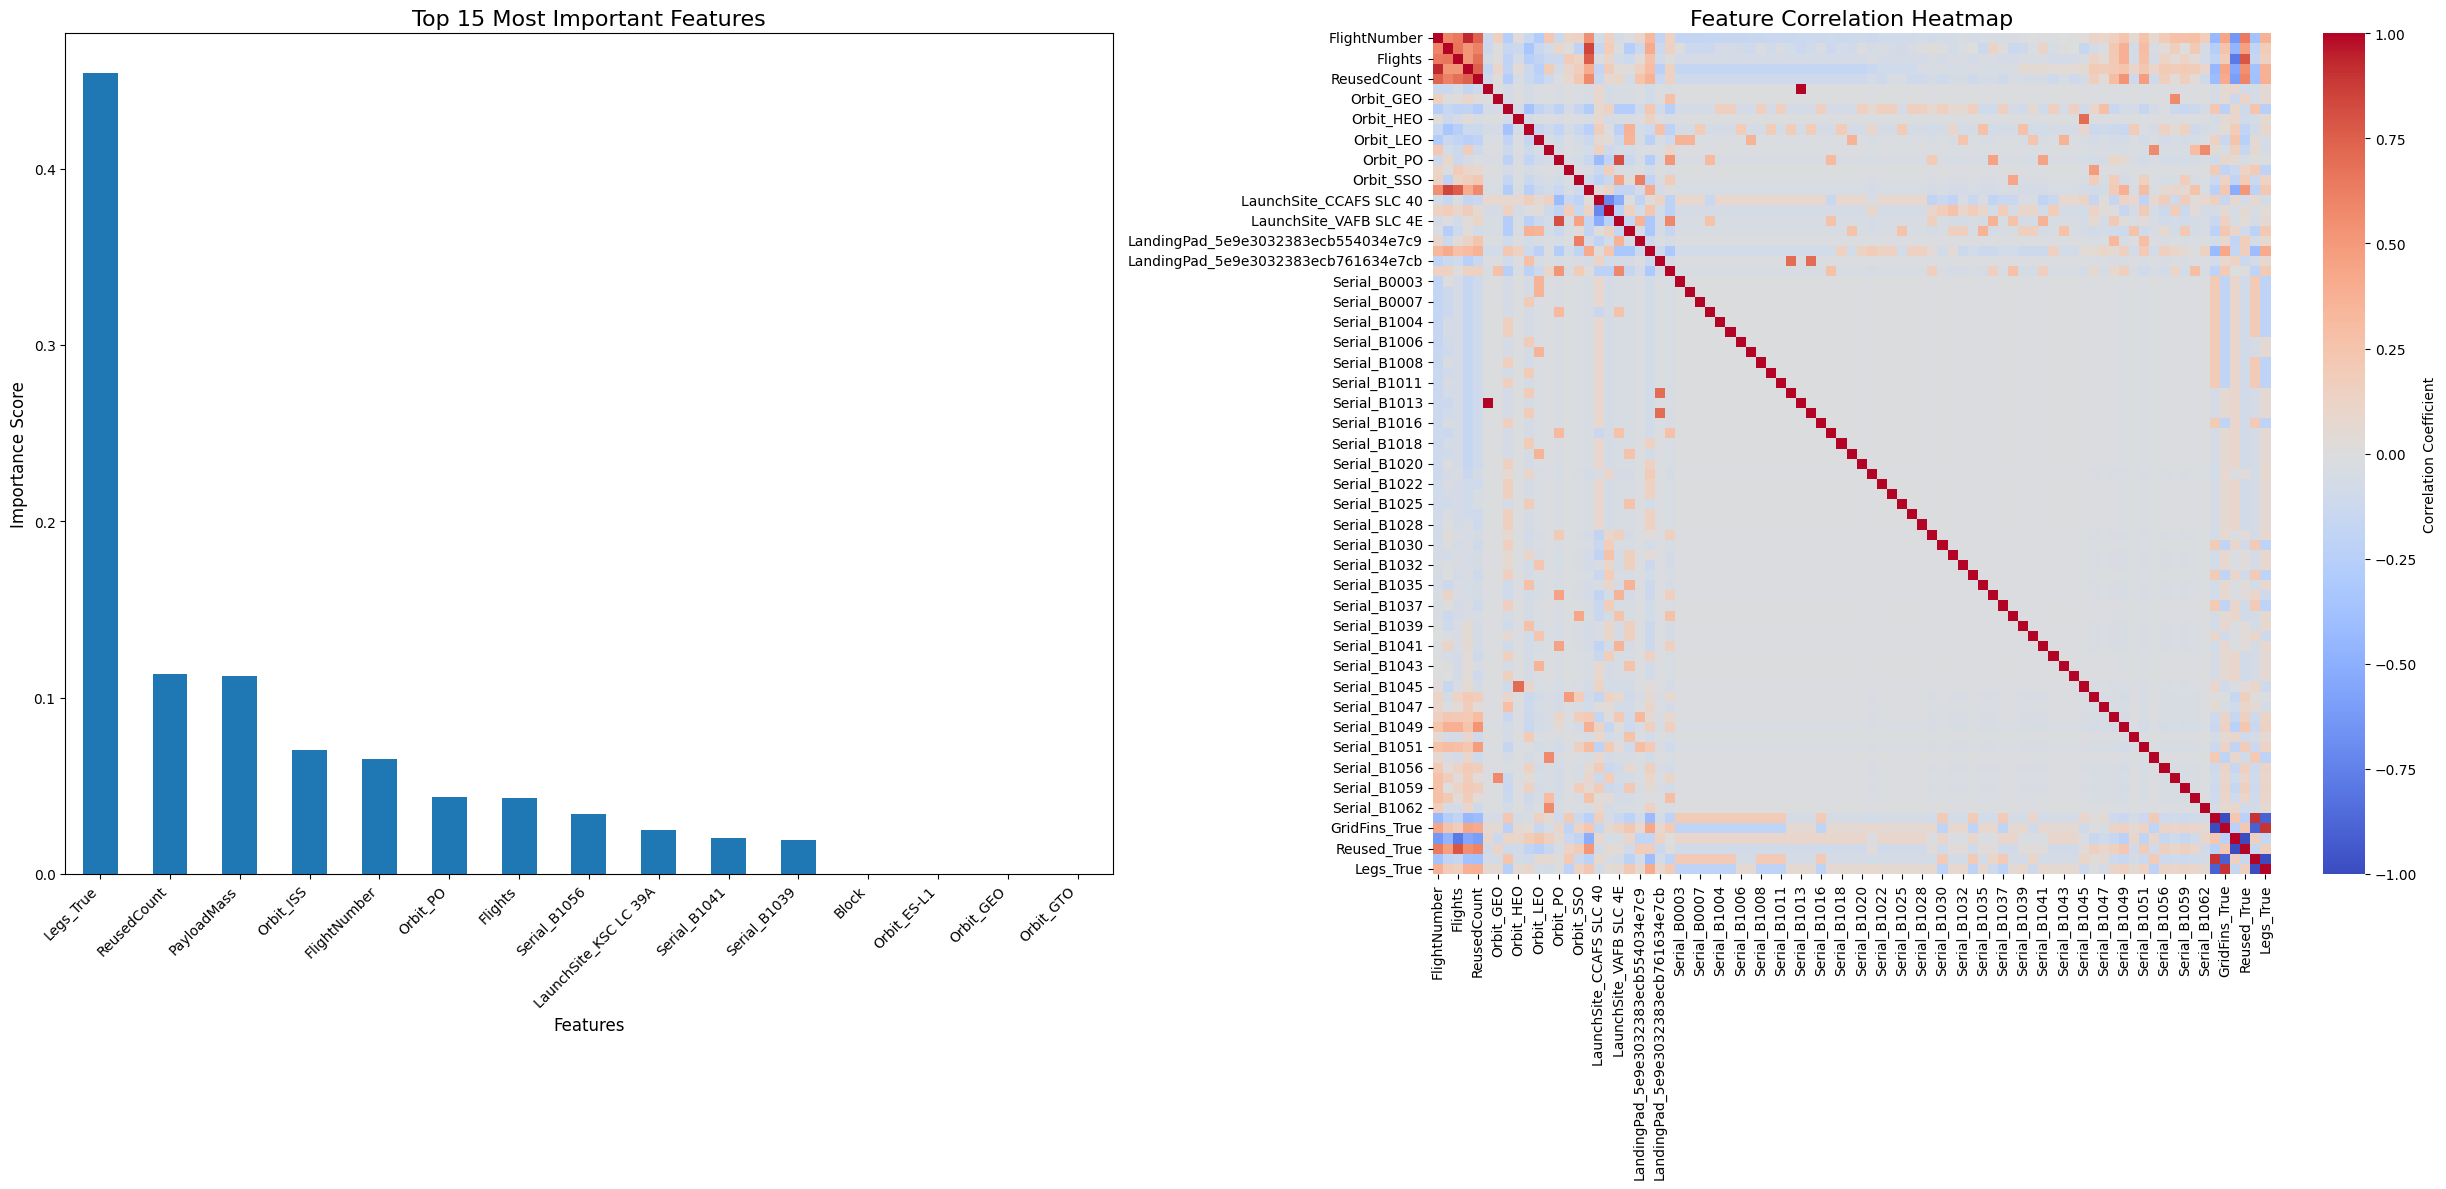


--- Top 15 Most Important Features ---
Legs_True: 0.4540
ReusedCount: 0.1131
PayloadMass: 0.1123
Orbit_ISS: 0.0701
FlightNumber: 0.0650
Orbit_PO: 0.0438
Flights: 0.0433
Serial_B1056: 0.0340
LaunchSite_KSC LC 39A: 0.0250
Serial_B1041: 0.0204
Serial_B1039: 0.0189
Block: 0.0000
Orbit_ES-L1: 0.0000
Orbit_GEO: 0.0000
Orbit_GTO: 0.0000

--- ALL Correlated Feature Pairs (Sorted by Absolute Correlation) ---
Orbit_ES-L1 - Serial_B1013: 1.0000
GridFins_False - GridFins_True: -1.0000
Reused_False - Reused_True: -1.0000
Legs_False - Legs_True: -1.0000
FlightNumber - Block: 0.9324
GridFins_False - Legs_False: 0.9023
GridFins_False - Legs_True: -0.9023
GridFins_True - Legs_False: -0.9023
GridFins_True - Legs_True: 0.9023
PayloadMass - Orbit_VLEO: 0.8468
Orbit_PO - LaunchSite_VAFB SLC 4E: 0.8112
Flights - Reused_False: -0.7826
Flights - Reused_True: 0.7826
Flights - Orbit_VLEO: 0.7612
Block - ReusedCount: 0.7433
FlightNumber - ReusedCount: 0.7352
LaunchSite_CCAFS SLC 40 - LaunchSite_KSC LC 39A: -0.7

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
data = pd.read_csv(URL1)
X = pd.read_csv(URL2)
Y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dt = DecisionTreeClassifier()
dt.fit(X_scaled, Y)

feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(15)

plt.figure(figsize=(25, 12))

plt.subplot(1, 2, 1)
top_features.plot(kind='bar')
plt.title('Top 15 Most Important Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
correlation_matrix = X.corr()

corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

all_corr_pairs = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0, 
            annot=False,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap', fontsize=16)

plt.tight_layout()
plt.show()

print("\n--- Top 15 Most Important Features ---")
for feature, importance in top_features.items():
    print(f"{feature}: {importance:.4f}")

print("\n--- ALL Correlated Feature Pairs (Sorted by Absolute Correlation) ---")
for feature1, feature2, correlation in all_corr_pairs:
    print(f"{feature1} - {feature2}: {correlation:.4f}")

# Additional analysis for strong correlations
print("\n--- Strong Correlations (|correlation| > 0.7) ---")
strong_correlations = [pair for pair in all_corr_pairs if abs(pair[2]) > 0.7]
for feature1, feature2, correlation in strong_correlations:
    print(f"{feature1} - {feature2}: {correlation:.4f}")

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)
def explore_data(feature):
    plt.figure(figsize=(10, 6))
    if data[feature].dtype == 'object':
        value_counts = data[feature].value_counts()
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    else:
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    print(f"\nSummary Statistics for {feature}:")
    print(data[feature].describe())
feature_dropdown = widgets.Dropdown(
    options=list(data.columns),
    description='Select Feature:',
    disabled=False
)
interactive_output = widgets.interactive(explore_data, feature=feature_dropdown)
display(feature_dropdown, interactive_output)
print("\nDataset Overview:")
print(f"Total Launches: {len(data)}")
print("\nLaunch Success Rate:")
print(data['Class'].value_counts(normalize=True).map('{:.2%}'.format))

Dropdown(description='Select Feature:', options=('FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orb…

interactive(children=(Dropdown(description='Select Feature:', options=('FlightNumber', 'Date', 'BoosterVersion…


Dataset Overview:
Total Launches: 90

Launch Success Rate:
Class
1    66.67%
0    33.33%
Name: proportion, dtype: object


In [15]:
import nbformat
import os

def extract_notebook_content(notebook_path):
    """
    Extract code cells and their outputs from a Jupyter notebook.
    
    Args:
    notebook_path (str): Path to the Jupyter notebook file
    
    Returns:
    str: Extracted content with code cells and their outputs
    """
    # Read the notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    
    # String to store extracted content
    extracted_content = []
    
    # Iterate through cells
    for cell in nb.cells:
        # Process only code cells
        if cell['cell_type'] == 'code':
            # Add the source code
            extracted_content.append("# Code Cell:")
            extracted_content.append(cell['source'].strip())
            
            # Add outputs if they exist
            if 'outputs' in cell and cell['outputs']:
                extracted_content.append("\n# Cell Outputs:")
                for output in cell['outputs']:
                    if output['output_type'] == 'stream':
                        extracted_content.append(output['text'].strip())
                    elif output['output_type'] == 'execute_result':
                        extracted_content.append(str(output['data']['text/plain']).strip())
                    elif output['output_type'] == 'display_data':
                        # For images or plot outputs
                        extracted_content.append("[Visualization Output]")
            
            # Add a separator between cells
            extracted_content.append("\n" + "-"*50 + "\n")
    
    # Join the content
    return "\n".join(extracted_content)

# Specify the path to your notebook
notebook_path = 'visualizations for the SpaceX launch prediction.ipynb'

# Extract and print the content
try:
    extracted_content = extract_notebook_content(notebook_path)
    
    # Save to a text file
    with open('visualization_notebook_extract.txt', 'w', encoding='utf-8') as f:
        f.write(extracted_content)
    
    print("Notebook content extracted successfully to visualization_notebook_extract.txt")
except FileNotFoundError:
    print(f"Error: Notebook file '{notebook_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Notebook content extracted successfully to visualization_notebook_extract.txt
